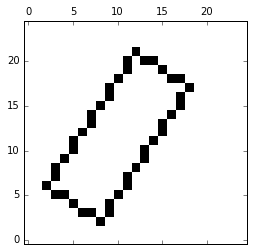

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

def line(arr, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    sx = 1 if x1 < x2 else -1
    dy = -abs(y2 - y1)
    sy = 1 if y1 < y2 else -1
    err = dx + dy
    
    while True:
        arr[x1, y1] = 0
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if (e2 > dy):
            err += dy
            x1 += sx
        if (e2 < dx):
            err += dx
            y1 += sy
            
def rectangle(arr, a, b, c):
    line(arr, *a, *b)
    line(arr, *b, *c)
    d = (c[0] + a[0] - b[0], c[1] + a[1] - b[1])
    line(arr, *c, *d)
    line(arr, *d, *a)
    
a = np.full((25, 25), 255, 'int')
rectangle(a, (6,2), (21,12), (17,18))
plt.matshow(a, cmap=cm.gray, origin="lower")

In [2]:
def originRotationMatrix(angle):
    return np.array([[np.cos(angle), -np.sin(angle), 0],
                     [np.sin(angle), np.cos(angle), 0],
                     [0, 0, 1]])
def translationMatrix(vx, vy):
    return np.array([[1, 0, vx],
                     [0, 1, vy],
                     [0, 0, 1]])
def rotationMatrix(centerX, centerY, angle):
    return np.dot(np.dot(translationMatrix(centerX, centerY),
                        originRotationMatrix(angle)),
                 translationMatrix(-centerX, -centerY))
def originScaleMatrix(scaleX, scaleY):
    return np.array([[scaleX, 0, 0],
                    [0, scaleY, 0],
                    [0, 0, 1]])
def scaleMatrix(centerX, centerY, scaleX, scaleY=None):
    if scaleY == None:
        scaleY = scaleX
    return np.dot(np.dot(translationMatrix(centerX, centerY),
                        originScaleMatrix(scaleX, scaleY)),
                 translationMatrix(-centerX, -centerY))        

In [6]:
R = rotationMatrix(3, 4, np.pi / 4)

In [5]:
def transformation(M):
    return lambda vec: np.round(np.dot(M, [*vec, 1])).astype("int")[0:2]

In [7]:
f = transformation(R)

In [8]:
f([45, 12])

array([27, 39])

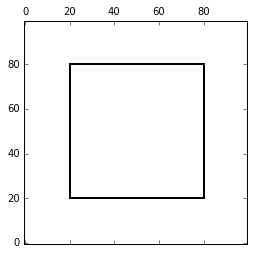

In [9]:
a = np.full((100,100), 255, 'int')
rect = [(20,20), (80,20), (80,80)]
rectangle(a, *rect)
plt.matshow(a, cmap=cm.gray, origin='lower')

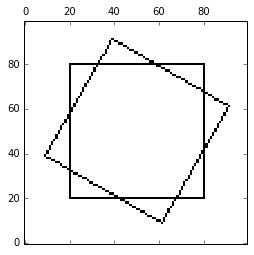

In [10]:
rectangle(a, *list(map(transformation(rotationMatrix(50, 50, np.pi/6)), rect)))
plt.matshow(a, cmap=cm.gray, origin='lower')

In [11]:
from images2gif import writeGif

In [13]:
rect = [(40,40), (260,40), (260,260)]
a = np.full((300, 300), 255, 'int')

def rectImg(angle, scale):
    rectangle(a, *list(map(transformation(scaleMatrix(150,150,scale)),
                           map(transformation(rotationMatrix(150,150,angle)),
                           rect))))
    return a.copy()

In [14]:
steps = 100
images = [rectImg(0.5 * np.pi * i/steps,
                  1 - 0.7 * i/steps) for i in range(steps)]
images += list(reversed(images))
writeGif("spiro.gif", images, repeat=1, duration=0.2)

![](spiro.gif)

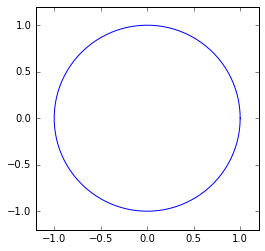

In [15]:
t = np.linspace(0, 2 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
plt.axis("scaled")
plt.axis([-1.2,1.2,-1.2,1.2])
plt.plot(x, y)

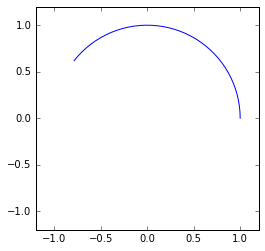

In [17]:
plt.axis("scaled")
plt.axis([-1.2,1.2,-1.2,1.2])
plt.plot(x[:40], y[:40])

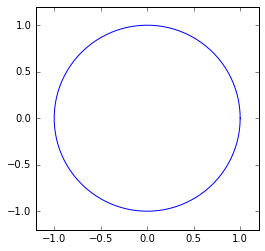

In [18]:
t = np.linspace(0, 1, 100)
xC = np.cos(2 * np.pi * t)
yC = np.sin(2 * np.pi * t)
plt.axis("scaled")
plt.axis([-1.2,1.2,-1.2,1.2])
plt.plot(xC, yC)

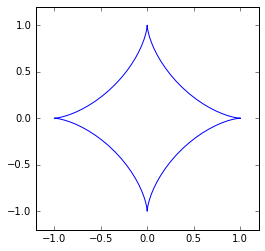

In [19]:
t = np.linspace(0, 1, 100)
xA = np.cos(2 * np.pi * t)**3
yA = np.sin(2 * np.pi * t)**3
plt.axis("scaled")
plt.axis([-1.2,1.2,-1.2,1.2])
plt.plot(xA, yA)

In [20]:
def showBetween(t):
    fig = plt.figure()
    plt.axis("off")
    plt.axis("scaled")
    plt.axis([-1.2, 1.2, -1.2, 1.2])
    plt.plot(t * xC + (1-t) * xA, t * yC + (1-t) * yA)
    return fig

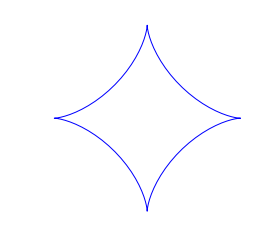

In [21]:
showBetween(0)
None

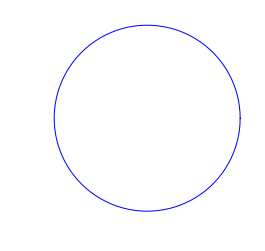

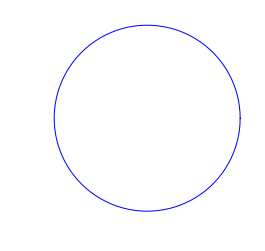

In [22]:
showBetween(1)

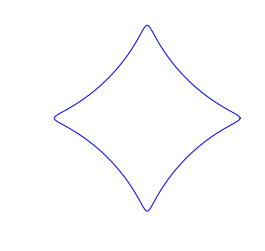

In [24]:
showBetween(0.2)
None

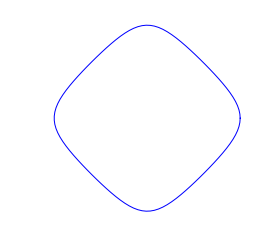

In [25]:
showBetween(0.7)
None

In [28]:
def picBetween(t):
    canvas = showBetween(t).canvas
    canvas.draw()
    arr = np.fromstring(canvas.tostring_rgb(), dtype=np.uint8)
    plt.close()
    w, h = canvas.get_width_height()
    return arr.reshape(h, w, 3)

In [29]:
images = [picBetween(t) for t in np.linspace(0, 1, 50)]
images += list(reversed(images))
writeGif("Astroide.gif", images)

![](Astroide.gif)